#Pandas and Visualization Homework with IMDb data
Anujit Basu

##Part 1

* read in 'imdb_1000.csv' and store it in a DataFrame named movies

In [1]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

movies = pd.read_csv('../DAT-DC-10/data/imdb_1000.csv')

C:\Users\Anujit_2\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


* check the number of rows and columns
* check the data type of each column

In [2]:
print 'Number of rows : ' + str(movies.shape[0])
print 'Number of columns : ' + str(movies.shape[1])
print '\n'
print 'The column data types are:\n' + str(movies.dtypes)

Number of rows : 979
Number of columns : 6


The column data types are:
star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


* calculate the average movie duration

In [3]:
print 'Average Movie Duration : ' + str(round(movies.duration.mean(),2)) + ' minutes'

Average Movie Duration : 120.98 minutes


* sort the DataFrame by duration to find the shortest and longest movies

In [4]:
movies.sort_values(['duration'],ascending=True,inplace=True)
print 'The shortest movie is \"' + movies.iloc[0].title + '\" at ' + str(movies.iloc[0].duration) + ' minutes'
print 'The longest movie is \"' + movies.iloc[-1].title + '\" at ' + str(movies.iloc[-1].duration) + ' minutes'


The shortest movie is "Freaks" at 64 minutes
The longest movie is "Hamlet" at 242 minutes


* create a histogram of duration

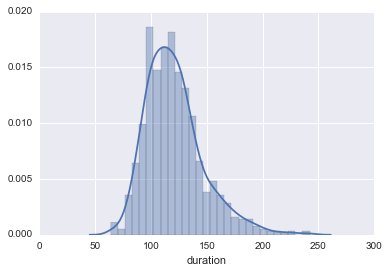

In [5]:
sns.distplot(movies.duration)

* use a box plot to display that same data

C:\Users\Anujit_2\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


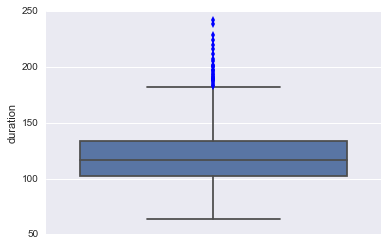

In [6]:
sns.boxplot(y='duration', data=movies)

##Part 2

* count how many movies have each of the content ratings

In [7]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

* use a visualization to display that same data, including a title and x and y labels

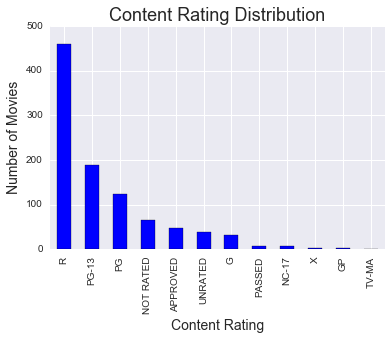

In [8]:
plt.xlabel('Content Rating', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.title('Content Rating Distribution', fontsize =18)
movies.content_rating.value_counts().plot(kind='bar')


* convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
* convert the following content ratings to "NC-17": X, TV-MA

In [9]:
movies['content_rating'] = movies['content_rating'].map({
        'R':'R',
        'PG-13':'PG-13', 
        'NOT RATED':'UNRATED',
        'APPROVED':'UNRATED',
        'UNRATED':'UNRATED',
        'G':'G',
        'PASSED':'UNRATED',
        'NC-17':'NC-17',
        'X':'NC-17',
        'GP':'UNRATED',
        'TV-MA':'NC-17'})

movies.content_rating.value_counts()

# I discovered Pandas.Series.replace() later

R          460
PG-13      189
UNRATED    160
G           32
NC-17       12
Name: content_rating, dtype: int64

* count the number of missing values in each column

In [10]:
# use the isnull() method and look for True values indicating missing values
movies.isnull().describe()

,star_rating,title,content_rating,genre,duration,actors_list
count,979,979,979,979,979,979
mean,0,0,0.128703,0,0,0
std,0,0,0.335042,0,0,0
min,False,False,False,False,False,False
25%,0,0,0,0,0,0
50%,0,0,0,0,0,0
75%,0,0,0,0,0,0
max,False,False,True,False,False,False


The only column with a True value is **content_rating**. Let's find out how many rows have missing data and then set a reasonable rating **UNRATED**

In [11]:
pd.isnull(movies['content_rating']).value_counts()

False    853
True     126
Name: content_rating, dtype: int64

* if there are missing values: examine them, then fill them in with "reasonable" values

In [12]:
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
G           32
NC-17       12
Name: content_rating, dtype: int64

In [13]:
movies.content_rating.fillna('UNRATED', inplace=True)
movies.content_rating.value_counts()

R          460
UNRATED    286
PG-13      189
G           32
NC-17       12
Name: content_rating, dtype: int64

The count for **UNRATED** went up from 160 to 286, a difference of 126. That is the same number of rows previously missing data. All other values retained the same count.

* calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours

In [14]:
print 'Movies of duration two hours or more have an average star rating of ' + \
    str(round(movies.where(movies.duration>=120).star_rating.mean(),2)) + \
    ' compared to an average star rating of ' + \
    str(round(movies.where(movies.duration<120).star_rating.mean(),2)) + \
    ' for movies of duration less than two hours.'

Movies of duration two hours or more have an average star rating of 7.95 compared to an average star rating of 7.84 for movies of duration less than two hours.


* use a visualization to detect whether there is a relationship between duration and star rating

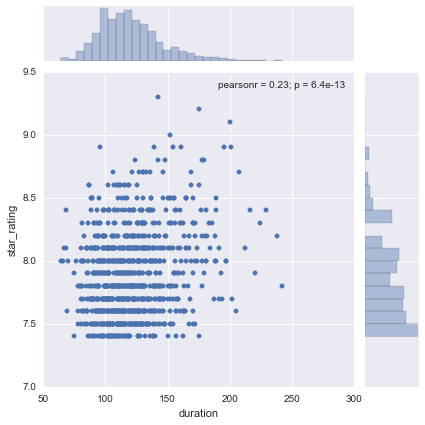

In [15]:
sns.jointplot("duration","star_rating",data=movies)

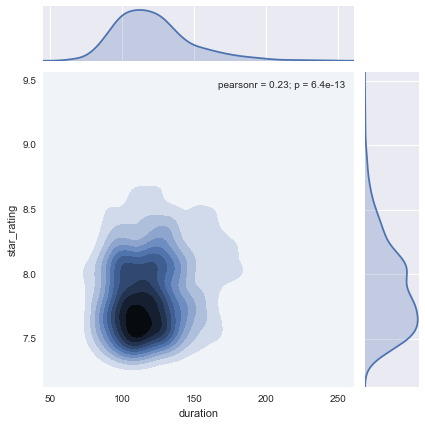

In [16]:
sns.jointplot("duration","star_rating",data=movies, kind='kde')

* the average duration for each genre

In [17]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

#Part 3

* visualize the relationship between content rating and duration

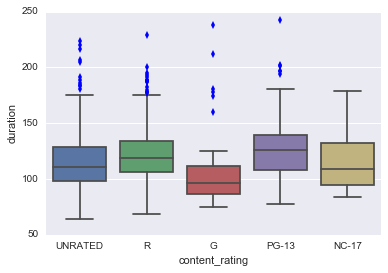

In [18]:
sns.boxplot(x='content_rating', y='duration', data=movies)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020DFBBA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000212F4438>]], dtype=object)

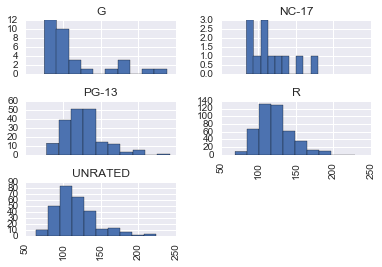

In [19]:
# could not figure out how to do this using Seaborn
movies.hist(column='duration', by='content_rating', sharex=True)

The **G** rated movies tend to be shorter (lower duration), and has low variability. This is natural, as children can only pay so much attention. (*Note:* We are talking about a much smaller number of movies, though.)

* determine the top rated movie (by star rating) for each genre

In [20]:
movies.sort_values(by='star_rating', ascending = False).groupby('genre').title. first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

* check if there are multiple movies with the same title, and if so, determine if they are actually duplicates

In [21]:
movies.title.value_counts().head(10)

Les Miserables                     2
True Grit                          2
The Girl with the Dragon Tattoo    2
Dracula                            2
Kung Fu Hustle                     1
Brokeback Mountain                 1
The Muppet Christmas Carol         1
Breakfast at Tiffany's             1
Cat on a Hot Tin Roof              1
Full Metal Jacket                  1
Name: title, dtype: int64

There seems to be four movie titles that appear multiple times, and in each case the title appears twice. I then used the Series df.title, applied the duplicated() method, and extracted a series of True and False booleans. Used the boolean series to slice the data. Much to my surprise, it only showed four rows, and these turned out to be just the 2nd time each of the duplicates were found.

In [22]:
movies[movies.title.duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."


I needed to take just the title from the above, and slice the dataframe again where the title matched these four titles.

In [23]:
movies[movies.title.isin(movies[movies.title.duplicated()].title)].sort_values(by='title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


These duplicate movies are all **remakes**. Therefore they are not the same movies. *The Girl with the Dragon Tattoo* movies are the Swedish version and the English remake.

* calculate the average star rating for each genre, but only include genres with at least 10 movies

In [24]:
movies.genre.value_counts() # gives a Series of genre and count
movies.genre.value_counts()>10 # coverts the Series to genre and True/False based on count > 10

movies.groupby('genre').star_rating.mean() # gives a Series of genre and average star rating

# filter the Series of genre and average star rating using the Series to True/False based on count > 10
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts()>10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#Bonus

* Figure out something "interesting" using the actors data!

In [25]:
movies.actors_list.describe()

count                                                   979
unique                                                  969
top       [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...
freq                                                      6
Name: actors_list, dtype: object

##What!! There are six movies with exactly the same actors!!
Is this a mistake? Who is Daniel Radcliffe??

In [26]:
for index, row in movies.iterrows():
    if 'Daniel Radcliffe' in row.actors_list:
        print row.title, row.actors_list

Harry Potter and the Deathly Hallows: Part 2 [u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']
Harry Potter and the Order of the Phoenix [u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']
Harry Potter and the Prisoner of Azkaban [u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']
Harry Potter and the Deathly Hallows: Part 1 [u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']
Harry Potter and the Sorcerer's Stone [u'Daniel Radcliffe', u'Rupert Grint', u'Richard Harris']
Harry Potter and the Half-Blood Prince [u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']
Harry Potter and the Goblet of Fire [u'Daniel Radcliffe', u'Emma Watson', u'Rupert Grint']


###Nevermind!